Atiya Kailany <br>
CS 679 - Machine Learning<br>
March 21, 2021<br>
<br>

# Iris dataset classifier
<br>
P.S. You must run all cells to be able to see output graphs.

## Importing Iris Data Set and Filter 2 Species

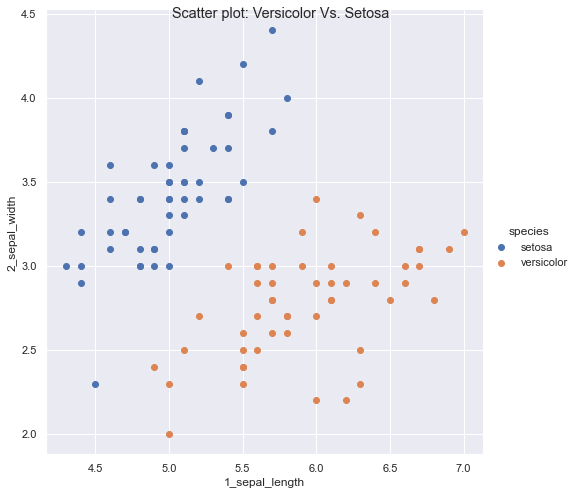

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]
data = df1.loc[(df1['species']=='setosa') | (df1['species']=='versicolor')]
#print(data.head(100))


#Plot the scatter of sepal length vs sepal width
temp = sns.FacetGrid(data, hue="species", height=7) .map(plt.scatter,"1_sepal_length", "2_sepal_width", )  .add_legend()
temp.fig.suptitle('Scatter plot: Versicolor Vs. Setosa')
temp.fig.figure




In [12]:
import math
#Q1
def discriminant(x, stdev, mean, Pc):
    result = -0.5 * math.log(2 * math.pi) - math.log(stdev) - ((x-mean)**2/(2*stdev*stdev)) + math.log(Pc)
    return result

## Q1a Using Sepal Length Feature

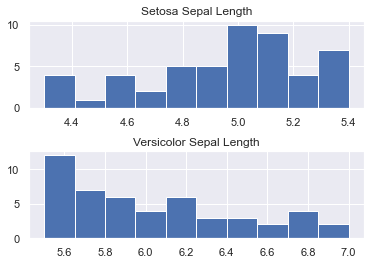

In [13]:
length_data = data.iloc[:,0]
setosa_length = data.loc[data['species']=='setosa'].iloc[:,0]
versicolor_length = data.loc[data['species']=='versicolor'].iloc[:,0]

versicolor_length_Mean = versicolor_length.mean()
versicolor_length_Stdev = versicolor_length.std()
setosa_length_Mean = setosa_length.mean()
setosa_length_Stdev = setosa_length.std()



# Pci = summation of number of instance / total number of instances which is 50/100 in my case
Pci = 0.5
Q1a_setosa =[]
Q1a_versicolor = []

for i in range(len(length_data)):
    setosa = discriminant(length_data[i], setosa_length_Mean, setosa_length_Stdev,Pci)
    versicolor = discriminant(length_data[i], versicolor_length_Mean, versicolor_length_Stdev,Pci)
    if (setosa > versicolor):
        Q1a_setosa.append(length_data[i])
    else:
        Q1a_versicolor.append(length_data[i])

fig, axs = plt.subplots(2)
axs[0].hist(Q1a_setosa)
axs[0].set_title('Setosa Sepal Length')
axs[1].hist(Q1a_versicolor)
axs[1].set_title('Versicolor Sepal Length')
fig.subplots_adjust(hspace=.5)


## Q1b Using Sepal Width Feature

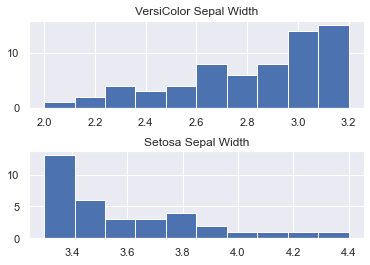

In [14]:
width_data = data.iloc[:,1]
setosa_width = data.loc[data['species']=='setosa'].iloc[:,1]
versicolor_width = data.loc[data['species']=='versicolor'].iloc[:,1]

versicolor_width_Mean = versicolor_width.mean()
versicolor_width_Stdev = versicolor_width.std()
setosa_width_Mean = setosa_width.mean()
setosa_width_Stdev = setosa_width.std()

# Pci = summation of number of instance / total number of instances which is 50/100 in my case
Pci = 0.5
Q1b_setosa =[]
Q1b_versicolor = []


for i in range(len(width_data)):
    setosaW = discriminant(width_data[i], setosa_width_Mean, setosa_width_Stdev,Pci)
    versicolorW = discriminant(width_data[i], versicolor_width_Mean, versicolor_width_Stdev,Pci)
    if (setosaW > versicolorW):
        Q1b_setosa.append(width_data[i])
    else:
        Q1b_versicolor.append(width_data[i])

fig, axs = plt.subplots(2)
axs[1].hist(Q1b_setosa)
axs[1].set_title('Setosa Sepal Width')
axs[0].hist(Q1b_versicolor)
axs[0].set_title('VersiColor Sepal Width')
fig.subplots_adjust(hspace=.5)



In [15]:
def quadratic(X, mean, cov, pci):
    return -0.5 * np.log(np.linalg.det(cov)) - 0.5 * (X.T @ np.linalg.inv(cov) @ X - 2 * X.T @ np.linalg.inv(cov) @ mean + mean.T @ np.linalg.inv(cov) @ mean) + np.log(pci)

def common_covMatrix(x, mean, cov, pci):
    return -0.5 * (x-mean).T @ np.linalg.inv(cov) @ (x-mean) + np.log(pci)

def diagonal_common_covMatrix(x, mean, cov, pci):
    return (-1 * (np.square(np.sum(np.square(x - mean)))) )/ (2*np.square(cov)) + np.log(pci)


# Q2
def predict_class(type, X, mean, cov, Pci):
    scores_list = []
    classes = len(mean)

    if (type == 'common'):
        for p in range(classes):
            score = common_covMatrix(X.reshape(-1,1), mean[p].reshape(-1,1), cov, Pci[p])
            scores_list.append(score)
    elif (type == 'different'):
        for p in range(classes):
            score = quadratic(X.reshape(-1,1),mean[p].reshape(-1,1),cov[p],Pci[p])
            scores_list.append(score)
    elif (type == 'diagonal'):
        for p in range(classes):
            score = diagonal_common_covMatrix(X.reshape(-1,1),mean[p].reshape(-1,1),cov[p][p],Pci[p])
            scores_list.append(score)
            

    return np.argmax(scores_list)


In [16]:
#Estimating the parameters
mu_list = np.split(data.groupby('species').mean().values, 2)
sigma = data.cov().values
com_sigma_list = np.split(data.groupby('species').cov().values,2, axis = 0)
com_pi_list = data.iloc[:,2].value_counts().values / len(data)


# 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4.2, 7.1, N)
Y = np.linspace(1.9, 4.5, N)
X, Y = np.meshgrid(X, Y)

dia = sns.FacetGrid(data, hue="species", height=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
com = sns.FacetGrid(data, hue="species", height=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
dif = sns.FacetGrid(data, hue="species", height=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()

diagonal_ax = dia.ax
common_ax = com.ax
different_ax = dif.ax


#Computing the predicted class function for each value on the grid
diagonal = np.array(  [predict_class('diagonal', np.array([xx,yy]).reshape(-1,1), mu_list, com_sigma_list, com_pi_list)
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

common = np.array(  [predict_class('common', np.array([xx,yy]).reshape(-1,1), mu_list, sigma, com_pi_list)
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

different = np.array(  [predict_class('different', np.array([xx,yy]).reshape(-1,1), mu_list, com_sigma_list, com_pi_list)
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Q2a = diagonal.reshape(X.shape)
Q2b = common.reshape(X.shape)
Q2c = different.reshape(X.shape)



#Plot the filled and boundary contours
diagonal_ax.contourf( X, Y, Q2a, 1, alpha = .1, colors = ('blue','red'))
diagonal_ax.contour( X, Y, Q2a, 1, alpha = 1, colors = ('blue','red'))

common_ax.contourf( X, Y, Q2b, 1, alpha = .1, colors = ('blue','red'))
common_ax.contour( X, Y, Q2b, 1, alpha = 1, colors = ('blue','red'))

different_ax.contourf( X, Y, Q2c, 1, alpha = .1, colors = ('blue','red'))
different_ax.contour( X, Y, Q2c, 1, alpha = 1, colors = ('blue','red'))

# Add axis and title
diagonal_ax.set_xlabel('X'); common_ax.set_xlabel('X'); different_ax.set_xlabel('X')
diagonal_ax.set_ylabel('Y'); common_ax.set_ylabel('Y'); different_ax.set_ylabel('Y')

diagonal_ax.set_title('Q2a: Diagonal Common Matrices')
common_ax.set_title('Q2b: Common Covariance Matrices')
different_ax.set_title('Q2c: Different Covariance Matrices')

plt.close('all')


## Q2a
<img width="447" alt="diagonal" src="https://user-images.githubusercontent.com/42689178/111888437-b6836c80-8999-11eb-93cf-7127a1b3788a.png">

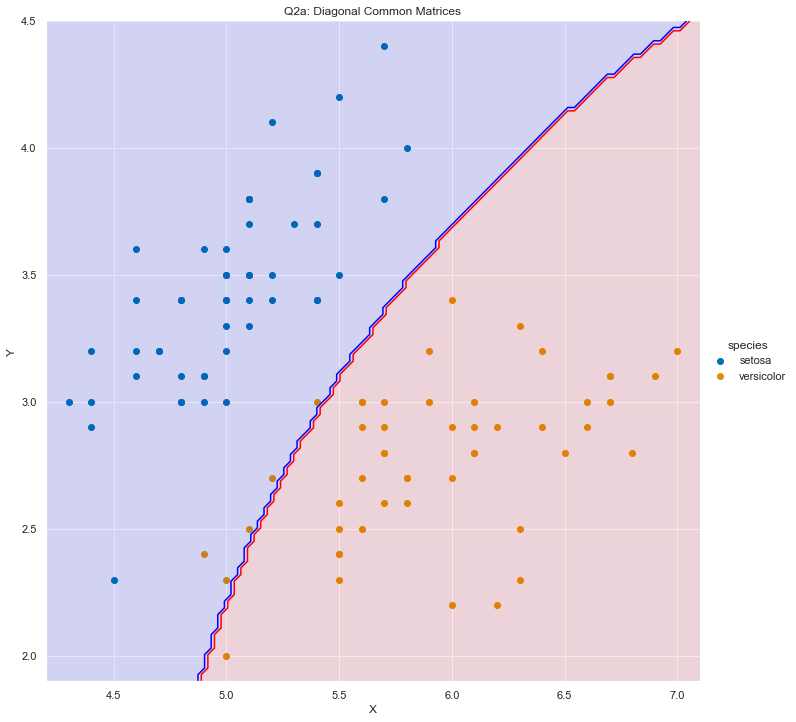

In [17]:
diagonal_ax.figure

## Q2b
<img width="720" alt="common" src="https://user-images.githubusercontent.com/42689178/111888445-c8650f80-8999-11eb-9041-0012a5167765.png">

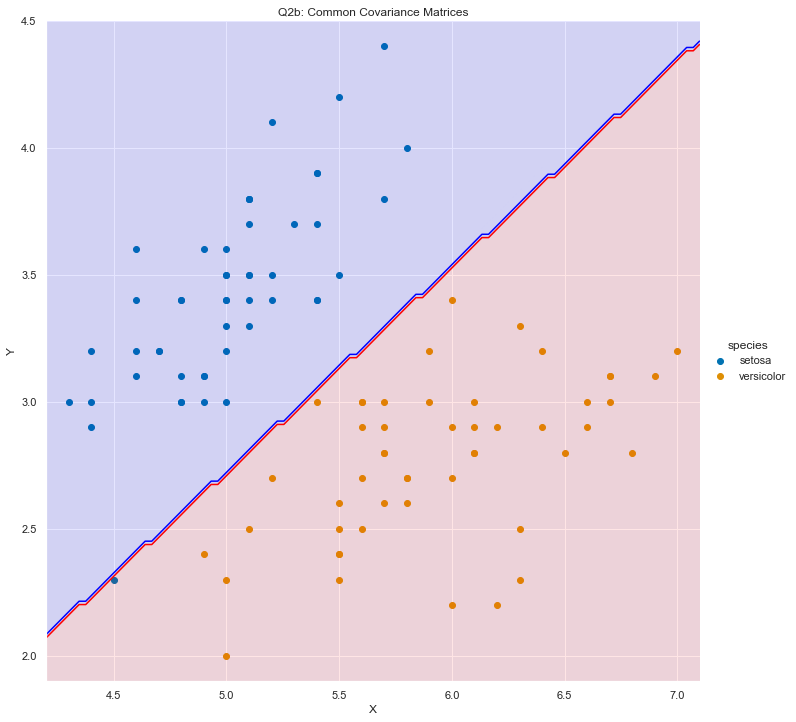

In [18]:
common_ax.figure

## Q2c
<img width="811" alt="different" src="https://user-images.githubusercontent.com/42689178/111888448-cac76980-8999-11eb-8114-953cfe013343.png">

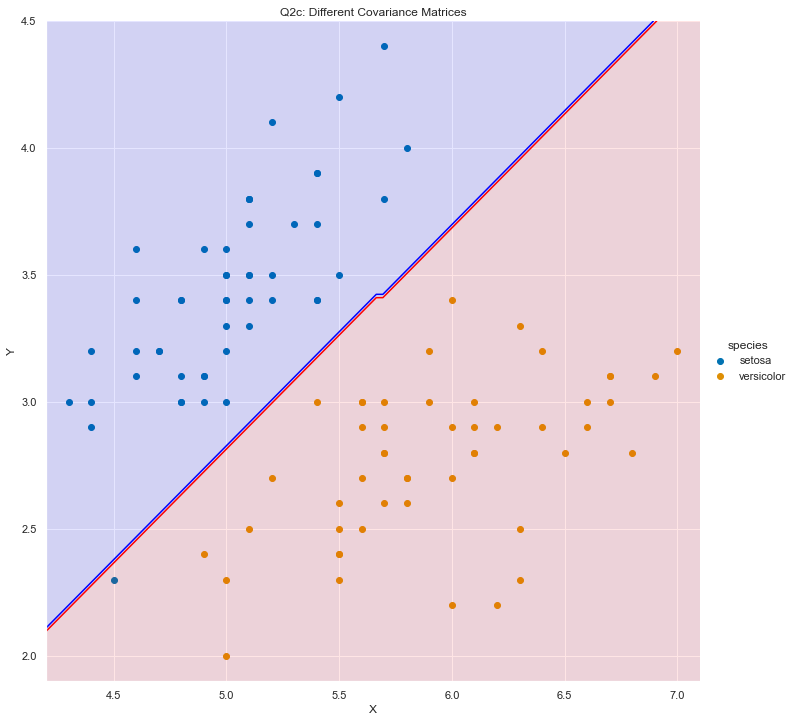

In [19]:
different_ax.figure

## Q3

Based on the above experiment, the different covariance matrices classifier had the highest accuracy
as it had the lowest error rate. This is obvious due to the fact that it is the most complicated classifier out of the
ones tested and was able to fit more features. Which ultimately, means higher accuracy compared to the other classifiers.

P.S. You must increase N to more than 1200 (N can be found above) to be able to see the error difference between Q2b and Q2c. Due to
extensively long processing time (>12 mins), N is only set to 100. You have to manually increase it.

In [20]:
#Shape training data
X_data = data.iloc[:,0:2]
y_labels = data.iloc[:,2].replace({'setosa':0,'versicolor':1}).copy()



#Classify and compute accuracy
common_pred = np.array(  [predict_class('common', np.array([xx,yy]).reshape(-1,1), mu_list, sigma, com_pi_list)
                     for xx, yy in zip(np.ravel(X_data.values[:,0]), np.ravel(X_data.values[:,1])) ] )

diagonal_pred = np.array(  [predict_class('diagonal', np.array([xx,yy]).reshape(-1,1), mu_list, sigma, com_pi_list)
                     for xx, yy in zip(np.ravel(X_data.values[:,0]), np.ravel(X_data.values[:,1])) ] )

different_pred = np.array(  [predict_class('different', np.array([xx,yy]).reshape(-1,1), mu_list, com_sigma_list, com_pi_list)
                     for xx, yy in zip(np.ravel(X_data.values[:,0]), np.ravel(X_data.values[:,1])) ] )


print('Q2a: Common and Diagonal Cov. Mat.',np.mean(diagonal_pred == y_labels))
print('Q2b: Common Covariance Mat.       ',np.mean(common_pred == y_labels))
print('Q2c: Different Covariance Mat.    ',np.mean(different_pred == y_labels))


Q2a: Common and Diagonal Cov. Mat. 0.94
Q2b: Common Covariance Mat.        0.99
Q2c: Different Covariance Mat.     0.99
